Cleaning Data and Finding Patterns in Aircraft Crashes using K Means Algorithm

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Airplane_Crashes_and_Fatalities_Since_1908.csv



In [2]:
df = pd.read_csv('../input/Airplane_Crashes_and_Fatalities_Since_1908.csv')

Importing the Data into a Pandas DataFrame for further analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.1+ KB


Getting an Idea about the type of the Data and the characteristics of the Dataset.

We can see that Flight#, Time, Route, cn/In have a lot of null values which will affect our Data , so Hence we clean it by dropping the respective columns.

In [4]:
df = df.drop('Flight #',axis=1)
df = df.drop('Time',axis=1)
df = df.drop('Route',axis=1)
df = df.drop('cn/In',axis=1)
df = df.drop('Summary',axis=1)
df.notnull()


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 8 columns):
Date            5268 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Type            5241 non-null object
Registration    4933 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
dtypes: float64(3), object(5)
memory usage: 329.3+ KB


Dropped the Null Values and the many columns.

In [5]:
df.head()

,Date,Location,Operator,Type,Registration,Aboard,Fatalities,Ground
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,NaN,2.0,1.0,0.0
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,NaN,5.0,5.0,0.0
2,08/06/1913,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,NaN,1.0,1.0,0.0
3,09/09/1913,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),NaN,20.0,14.0,0.0
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),NaN,30.0,30.0,0.0


Having a look at the data

In [6]:
X = df.drop('Location',axis=1)
X = X.drop('Type',axis=1)
X = X.drop('Date',axis=1)
X = X.drop('Operator',axis=1)
X = X.drop('Ground',axis=1)
X = X.drop('Registration',axis=1)
X = X.dropna()
xc=X
X = X.values
y = (df['Type'].values)


#Xamples=[]
#Xamples[:,0] = X
#Xamples[:,1] = Y

print(X)
    

[[   2.    1.]
 [   5.    5.]
 [   1.    1.]
 ..., 
 [ 228.  228.]
 [   1.    1.]
 [  13.   13.]]


We are Preparing the Data to be fed for K-Means Clustering Algorithm, as it supports only numeric values. We can see that only Ground, Aboard and Fatalities have a numeric value from the description in the above cell.

[[  2   1]
 [  5   5]
 [  1   1]
 ..., 
 [228 228]
 [  1   1]
 [ 13  13]]


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:427: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


3258.96295505


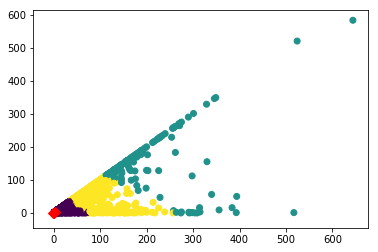

In [7]:
samples = X.astype(int)

print(samples)

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline 

scaler = StandardScaler() 
kmeans = KMeans(n_clusters=3)

model = make_pipeline(scaler,kmeans ) 
#nm = normalize(1)

#samples = nm(samples)


model.fit(samples)
labels = model.predict(samples)

import matplotlib.pyplot as plt 

xs = samples[:,0]
ys = samples[:,1]

plt.scatter(xs, ys, c=labels)

centroids = kmeans.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x,centroids_y,color='Red',marker='D',s=50)

print(kmeans.inertia_)


plt.show()
        

Performing K-Means Clustering over the Dataset. We have chosen a cluster size of 3. 

The Data was first Standardized and then fed into the K-Means Clustering Algorithm via a Pipeline.

The Pipeline ensures that automatic flow of data between diffrent steps.

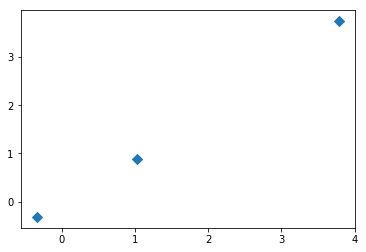

In [8]:
centroids = kmeans.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

Plotting the Cluster Centers

In [9]:
print(kmeans.inertia_)

3258.96295505


Getting the Inertia Value. The lower the better. 

Inertia gives us the sum of the distance of each value from the center of it's cluster.

We usually plot the Inertia value for different number of clusters and ideally select the one that lies on the elbow.

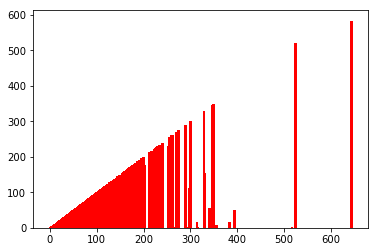

In [10]:
fig,ax = plt.subplots()
ax.bar( xs,ys, width=6, color='r')

plt.show()

We can see very well that there are many outliers in the Data. 

These are the miracle cases in which some of the passenger managed to survive the crash.

These are the same crashes which lie in cluster number 3 in the K-Means Cluster indicating a outlier trend.